In [1]:
# 경고무시
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [2]:
# load library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10

In [3]:
# load data
# 2021-01-01_2021-06-30
online_data = pd.read_csv("C:/nh/네이버_상품_고객프로파일_자녀나이.csv")
online_data.head()

,상품카테고리(대),상품카테고리(중),상품카테고리(소),상품카테고리(세),상품명,상품ID,자녀나이,결제금액,결제수,결제상품수량,환불금액,환불건수,환불수량,실결제금액,실결제상품수량
0,식품,농산물,쌀,백미,[농협양곡] 김포금쌀 고시히카리 10kg,5201386377,자녀없음,"8,202,000",170,195,"420,200",7,10,7781800,185
1,식품,농산물,쌀,백미,[농협양곡] 김포금쌀 고시히카리 10kg,5201386377,미취학,"5,695,200",125,136,"333,300",8,8,5361900,128
2,식품,농산물,쌀,백미,[농협양곡] NH신동진쌀 20kg,4939329513,자녀없음,"5,246,200",77,83,"314,000",5,5,4932200,78
3,식품,농산물,쌀,백미,[농협양곡] 김포금쌀 고시히카리 10kg,5201386377,초등학생,"5,123,200",112,122,"211,800",5,5,4911400,117
4,식품,농산물,쌀,백미,[농협양곡] NH신동진쌀 20kg,4939329513,성인,"4,682,600",71,74,"63,400",1,1,4619200,73


In [4]:
# 결측치 확인
online_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   상품카테고리(대)  445 non-null    object
 1   상품카테고리(중)  445 non-null    object
 2   상품카테고리(소)  445 non-null    object
 3   상품카테고리(세)  445 non-null    object
 4   상품명        445 non-null    object
 5   상품ID       445 non-null    int64 
 6   자녀나이       445 non-null    object
 7   결제금액       445 non-null    object
 8   결제수        445 non-null    int64 
 9   결제상품수량     445 non-null    int64 
 10  환불금액       445 non-null    object
 11  환불건수       445 non-null    int64 
 12  환불수량       445 non-null    int64 
 13  실결제금액      445 non-null    int64 
 14  실결제상품수량    445 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 52.3+ KB


In [5]:
# 통계량 파악
online_data['자녀나이'].describe()

count      445
unique       6
top       자녀없음
freq        83
Name: 자녀나이, dtype: object

In [6]:
# 가구당 결제상품수량 파악
grouped_name_s = online_data.groupby('자녀나이').sum()['실결제상품수량']
grouped_name_s

자녀나이
0-24개월     477
미취학        762
성인        1046
자녀없음      1637
중고등학생      735
초등학생       949
Name: 실결제상품수량, dtype: int64

In [10]:
# 결혼상태별 선호 곡물
grouped_name_s_r = online_data.groupby(['자녀나이','상품카테고리(세)'])['실결제상품수량'].sum()
grouped_name_s_r

자녀나이    상품카테고리(세)
0-24개월  백미            464
        혼합곡            13
미취학     백미            740
        혼합곡            22
성인      백미           1024
        혼합곡            22
자녀없음    백미           1610
        혼합곡            27
중고등학생   백미            696
        혼합곡            39
초등학생    백미            878
        혼합곡            71
Name: 실결제상품수량, dtype: int64

In [7]:
# 가구당 결제금액 파악
grouped_name_m = online_data.groupby('자녀나이').sum()['실결제금액']
grouped_name_m

자녀나이
0-24개월    20369800
미취학       34395400
성인        48694900
자녀없음      67278200
중고등학생     33699800
초등학생      43611700
Name: 실결제금액, dtype: int64

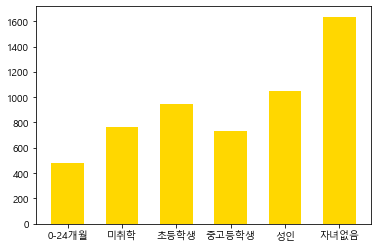

In [8]:
# 자녀나이 결제상품수량 파악
x = np.arange(6)
years = ['0-24개월','미취학','초등학생','중고등학생','성인','자녀없음']
values = [477, 762, 949, 735, 1046, 1637]

plt.bar(x, values, width=0.6, color="gold",
        linewidth=3, tick_label=years)

plt.show()

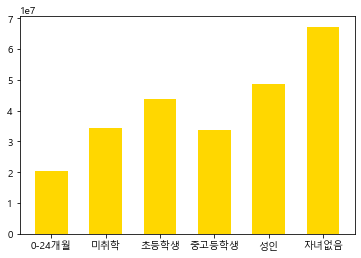

In [9]:
# 자녀나이 결제금액 파악
x = np.arange(6)
years = ['0-24개월','미취학','초등학생','중고등학생','성인','자녀없음']
values = [20369800, 34395400, 43611700, 33699800, 48694900, 67278200]

plt.bar(x, values, width=0.6, color="gold",
        linewidth=3, tick_label=years)

plt.show()